# Preproccesing

- Purpose
    - find how to make the study data from origin

## import Library

In [60]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import csv
import seaborn as sns
import json
import glob
import collections
import matplotlib.pyplot as plt
from matplotlib import animation, rc, gridspec
from IPython.display import HTML
import numpy as np
from math import *
import os
from collections import defaultdict
import time
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = ['Hiragino Sans', 'Meiryo', 'MS Gothic']


## Confirm Origin Data

In [5]:
#Agoopデータ読み込み
df_02week4 = pd.read_csv('../data/201902_week4.csv')
df_02week4.drop(columns = ["Unnamed: 0","Unnamed: 0.1"],inplace = True)

In [8]:
df_02week4.head(1)

,citycode,dailyid,home_citycode,judge,lat,lon,workplace_citycode,hour,min,meshid,大分類,中分類,小分類
0,13201.0,78a761ea8075a4d20c75432fec3b7526d4afde1add80c2...,13200.0,stay,35.659915,139.334489,13200.0,0,0,53393296,販売・卸,食料品・嗜好品,茶小売業


In [10]:
df_02week4.head(1)
print(df_02week4["大分類"].value_counts(dropna = False))
print(df_02week4["citycode"].value_counts(dropna = False))

NaN                   1327323
OoR                    174670
その他サービス                173083
販売・卸                   171011
飲食店                    123080
自動車・オートバイ・自転車・ドライブ     116893
医療・薬・保険衛生               99876
学校・趣味教室・図書館             95993
建設・工事                   93738
官公庁・団体・福祉               86895
製造・加工                   77936
金融・保険・証券                46095
不動産・賃貸・展示場              32565
交通・運輸・倉庫                27200
スポーツ・趣味娯楽・レジャー          22247
電気・ガス・通信・放送・新聞          12185
出版・印刷                   12178
旅行・観光・温泉・旅館・ホテル          8269
農林・水産・鉱業                 2128
Name: 大分類, dtype: int64
13208.0    552053
13206.0    193928
13112.0    157779
13104.0    136128
13201.0    107947
            ...  
28464.0         1
20415.0         1
7301.0          1
20309.0         1
40610.0         1
Name: citycode, Length: 1083, dtype: int64


In [12]:
# Filtering city code, split time to min and hour, redefine mesh id
df_02week4[df_02week4['citycode'] != -1.0]
df_05['hour'] = df_05['time'].str[11:13]
df_05['hour'] = df_05['hour'].astype(int)
df_05['min'] = df_05['time'].str[14:16]
df_05['min'] = df_05['min'].astype(int)
df_05['meshid'] = df_05['mesh100mid'].astype(str).str[:8]

# Split 15 min interval
df_05 = df_05[(df_05['min'] == 0) | (df_05['min'] == 15) | (df_05['min'] == 30 )| (df_05['min'] == 45) ]

# Remake Class Column 
tmp = df_05['poi'].str.split(',',  expand=True)
tmp1 = tmp[3].str.split("'",  expand=True)
tmp2 = tmp[1].str.split("'",  expand=True)
tmp3 = tmp[2].str.split("'",  expand=True)

df_05['大分類'] = tmp1[1]
df_05['中分類'] = tmp2[1]
df_05['小分類'] = tmp3[1]

# save 
df_05.to_csv('sakagami_processsing/201904_home_fin/201904_week5.csv')

,citycode,dailyid,home_citycode,judge,lat,lon,workplace_citycode,hour,min,meshid,大分類,中分類,小分類


## Check Real Data

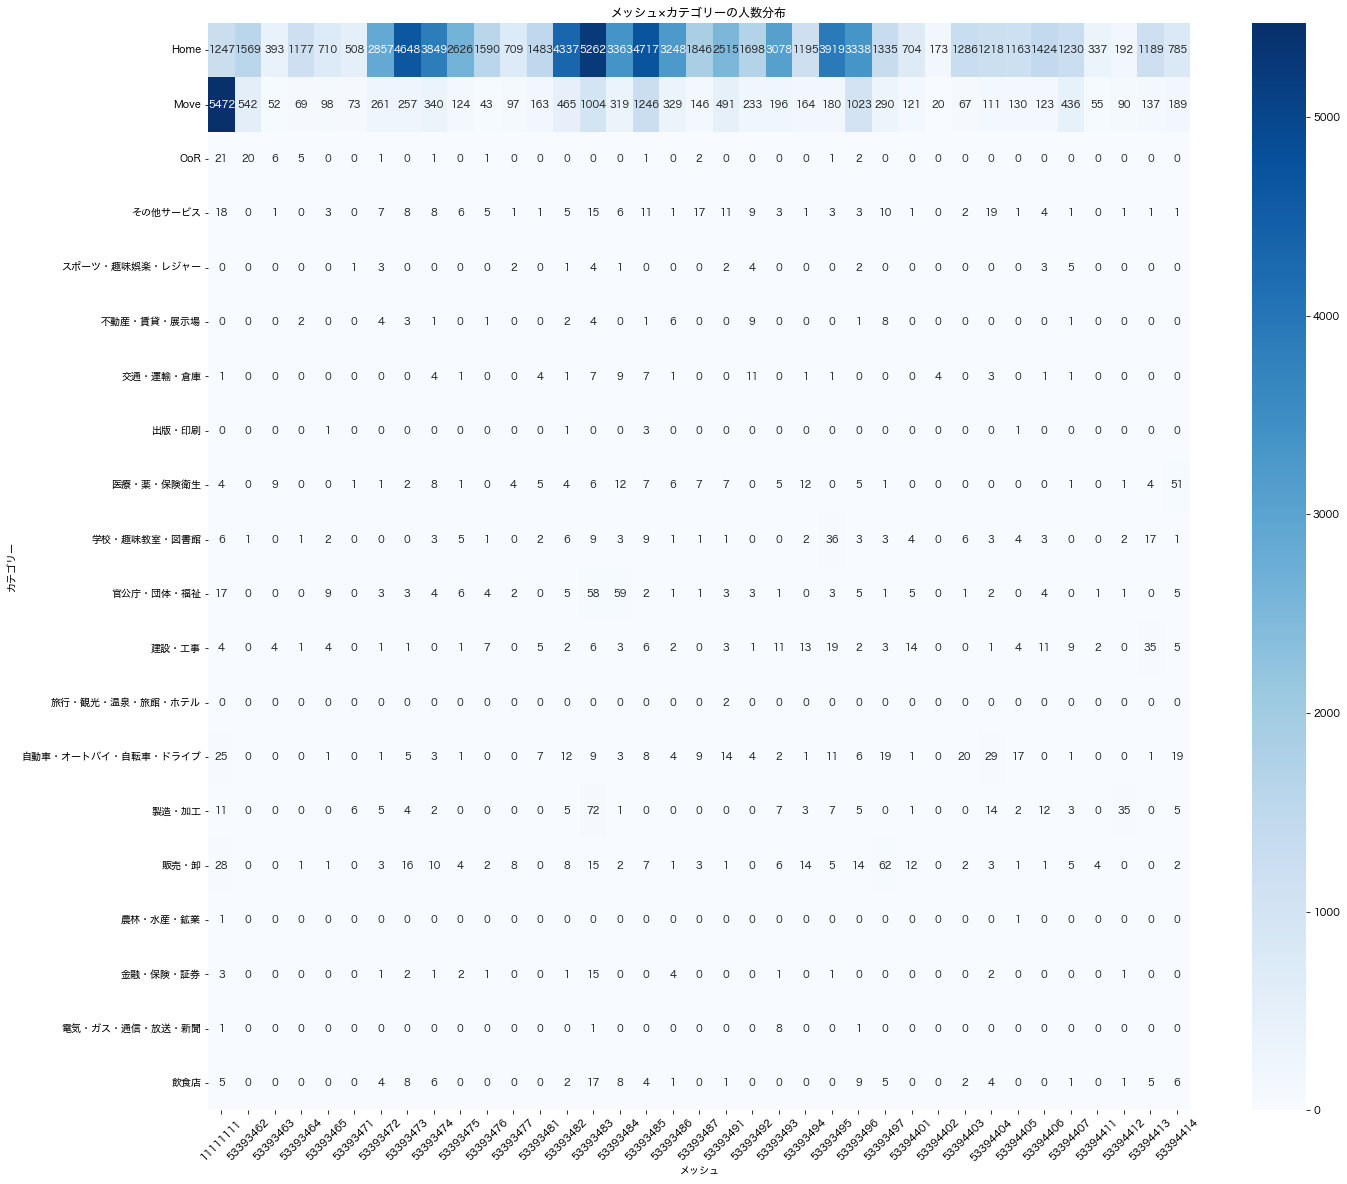

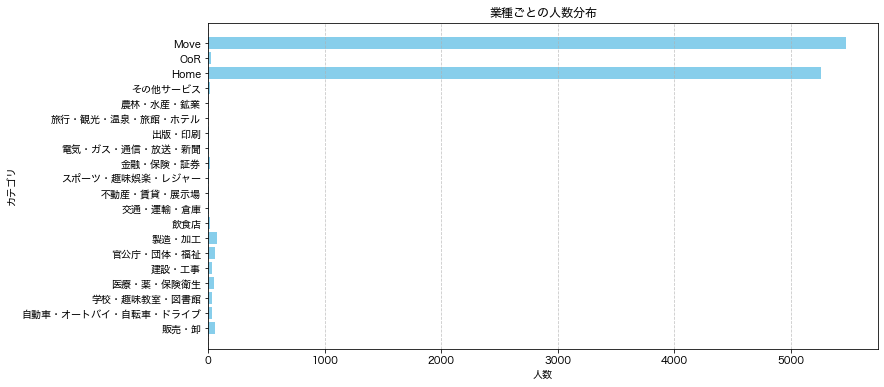

In [64]:
import json

file_path = '/Users/osamu/study/sakagami/Sakagami_code/sakagami_processsing/true_data/06_fin.json' # 調布市の正解データ
# file_path = '/Users/osamu/study/sakagami/Sakagami_code/sakagami_processsing/true_data1/6_fin.json'
# file_path = '/Users/osamu/study/sakagami/Sakagami_code/sakagami_processsing/true_data2/6_fin.json'

with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)
data

# データ整形
df = pd.DataFrame(list(data.items()), columns=["key", "value"])
df["mesh"] = df["key"].str.split("_").str[0]
df["category"] = df["key"].str.split("_").str[1]
df = df.pivot(index="category", columns="mesh", values="value").fillna(0)

# ヒートマップ描画
# 薄い色を使用したヒートマップ
plt.figure(figsize=(22, 20))
sns.heatmap(df, cmap="Blues", annot=True, fmt="d", cbar=True)
plt.xlabel("メッシュ")
plt.ylabel("カテゴリー")
plt.title("メッシュ×カテゴリーの人数分布")
plt.xticks(rotation=45)
plt.show()


# データをDataFrameに変換
df = pd.DataFrame(list(data.items()), columns=["カテゴリ", "人数"])

# メッシュ番号を抽出
df["メッシュ番号"] = df["カテゴリ"].apply(lambda x: x.split("_")[0])
df["カテゴリ"] = df["カテゴリ"].apply(lambda x: x.split("_")[1])

plt.figure(figsize=(12, 6))
plt.barh(df["カテゴリ"], df["人数"], color="skyblue")
plt.xlabel("人数")
plt.ylabel("カテゴリ")
plt.title("業種ごとの人数分布")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

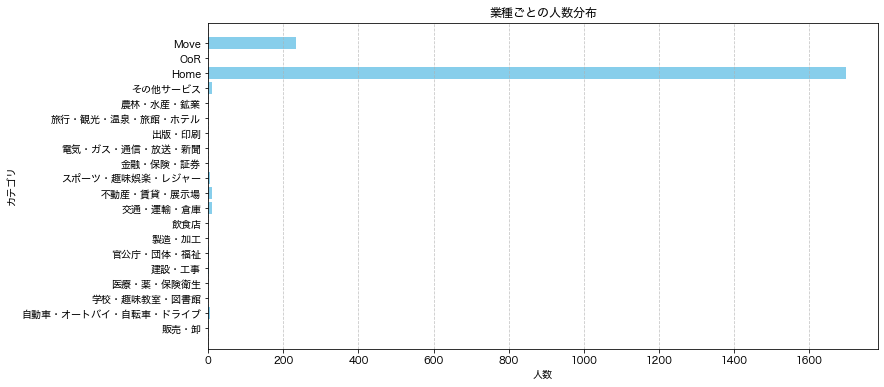

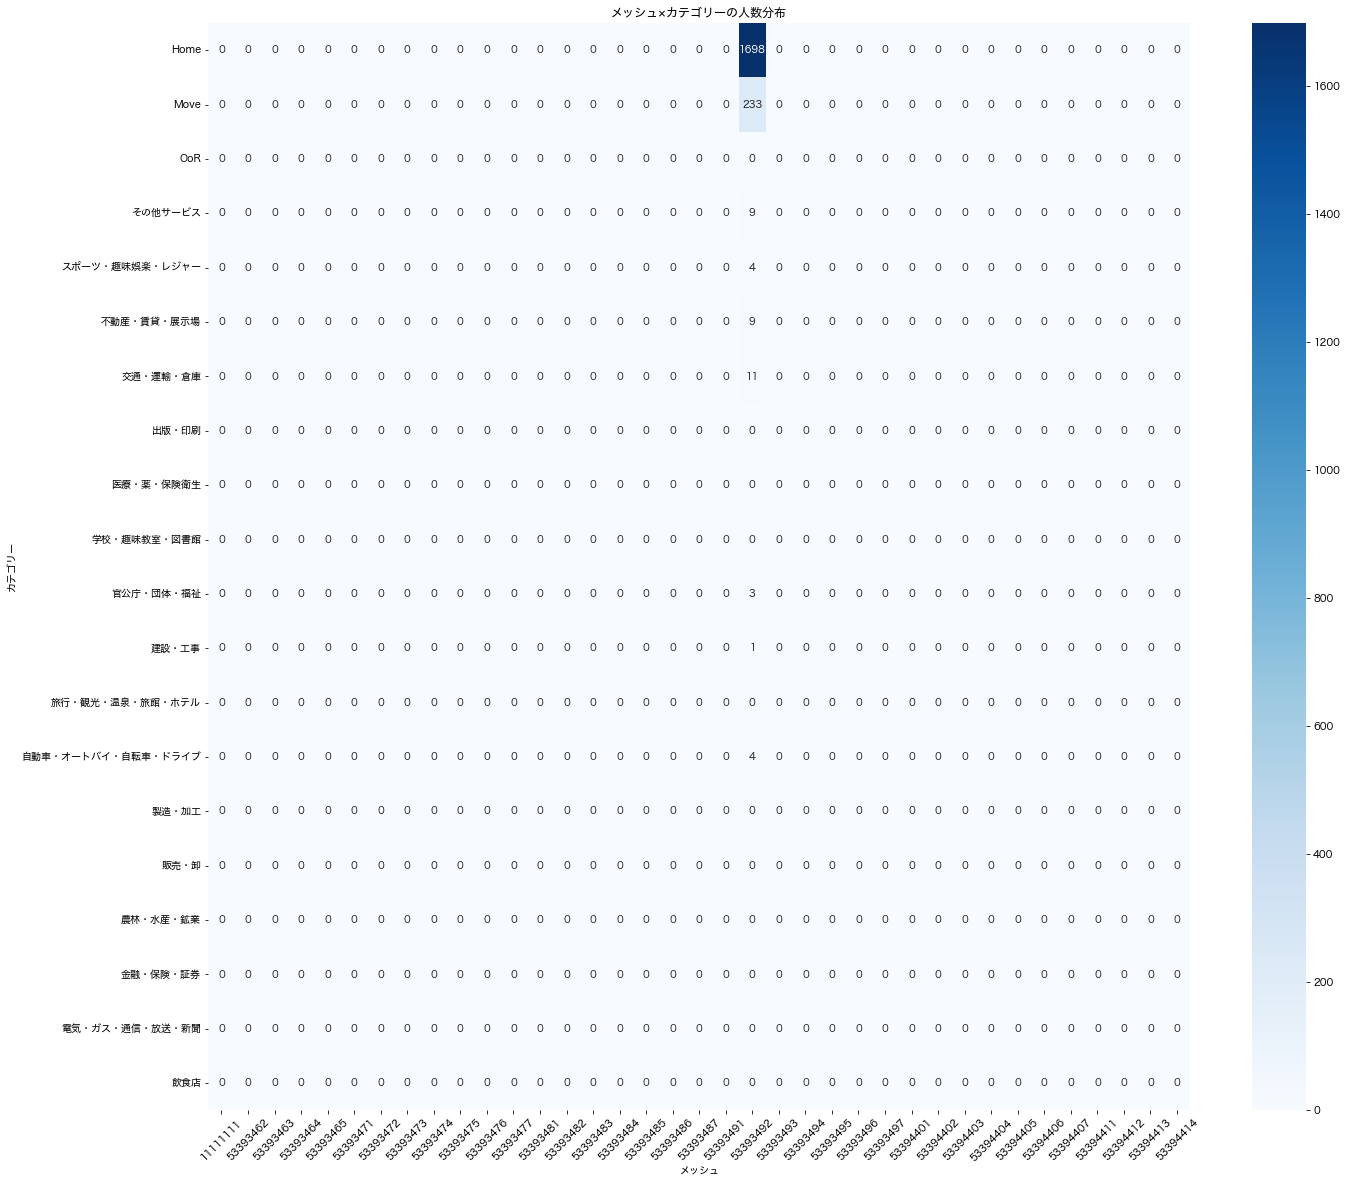

In [55]:

file_path = '/Users/osamu/study/sakagami/Sakagami_code/sakagami_processsing/true_data2/6_fin.json'
file_path = '/Users/osamu/study/sakagami/Sakagami_code/sakagami_processsing/true_data2/6_fin.json'

with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)
data


# データをDataFrameに変換
df = pd.DataFrame(list(data.items()), columns=["カテゴリ", "人数"])

# メッシュ番号を抽出
df["メッシュ番号"] = df["カテゴリ"].apply(lambda x: x.split("_")[0])
df["カテゴリ"] = df["カテゴリ"].apply(lambda x: x.split("_")[1])


plt.figure(figsize=(12, 6))
plt.barh(df["カテゴリ"], df["人数"], color="skyblue")
plt.xlabel("人数")
plt.ylabel("カテゴリ")
plt.title("業種ごとの人数分布")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# データ整形
df = pd.DataFrame(list(data.items()), columns=["key", "value"])
df["mesh"] = df["key"].str.split("_").str[0]
df["category"] = df["key"].str.split("_").str[1]
df = df.pivot(index="category", columns="mesh", values="value").fillna(0)

# ヒートマップ描画
# 薄い色を使用したヒートマップ
plt.figure(figsize=(22, 20))
sns.heatmap(df, cmap="Blues", annot=True, fmt="d", cbar=True)
plt.xlabel("メッシュ")
plt.ylabel("カテゴリー")
plt.title("メッシュ×カテゴリーの人数分布")
plt.xticks(rotation=45)
plt.show()

データの形状: (740, 740)
最小値: 0.0
最大値: 1.0
平均: 0.001351351351351351
標準偏差: 0.0355481000064126


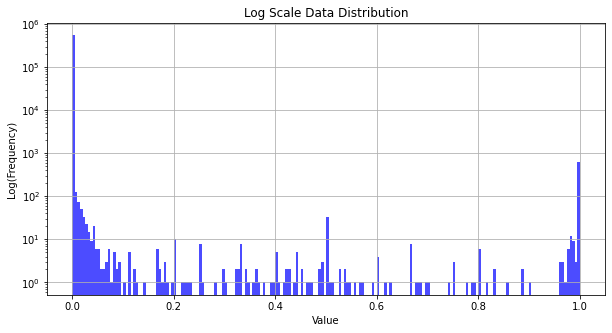

In [41]:
## Check Probability 

dir_path = '/Users/osamu/study/sakagami/Sakagami_code/sakagami_processsing/pre/new'
mat_files = sorted(glob.glob(os.path.join(dir_path,'*.npy')))
mat_files

file_path = dir_path + "/06_01.npy"

# npyファイルの読み込み
data = np.load(file_path)
print(f"データの形状: {data.shape}")
print(f"最小値: {data.min()}")
print(f"最大値: {data.max()}")
print(f"平均: {data.mean()}")
print(f"標準偏差: {data.std()}")


plt.figure(figsize=(10, 5))
plt.hist(data.flatten(), bins=200, color="blue", alpha=0.7, log=True)  # log=True で対数スケール
plt.xlabel("Value")
plt.ylabel("Log(Frequency)")
plt.title("Log Scale Data Distribution")
plt.grid(True)
plt.show()